<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: France Martínez</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

# Ayudantía
## 1.1 Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib

In [6]:
import numpy as np
import pandas as pd

datos_txt = np.loadtxt("H-H1_GWOSC_16KHZ_R1-1268431079-32.txt",skiprows=3) # Con loadtxt se carga el archivo, con skiprows se le dice que salte las primeras 3 líneas
datos_csv = pd.read_csv("AbsorbanceTE_0-0.csv",skiprows=1)  # Se usa pandas para cargar el archivo csv

## 1.2 Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 

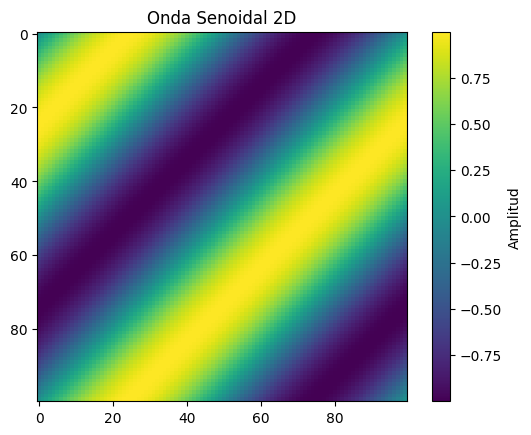

Text(0.5, 0.92, 'Grafico 3D de la superficie')

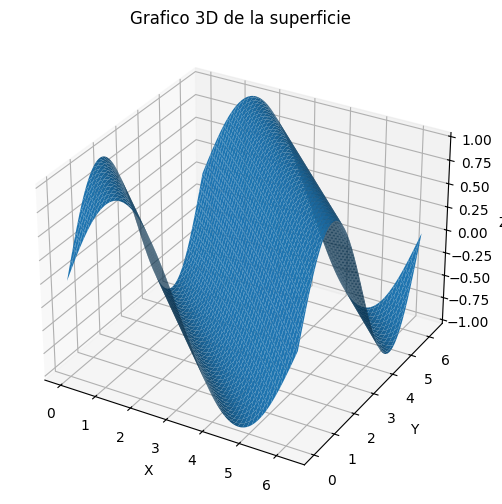

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)                    # Genera una malla para x e y.
Z = np.sin(X + Y)

# Gráfico en vista 2D (gráfico de magnitudes)
plt.imshow(Z)         
plt.colorbar(label='Amplitud')
plt.title('Onda Senoidal 2D')
plt.show()

# Gráfico 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')          # crea la figura en 3D

ax.plot_surface(X,Y,Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Grafico 3D de la superficie')

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizarás para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


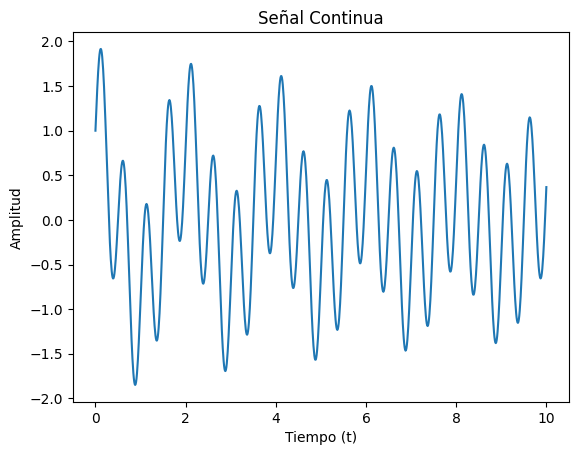

In [21]:
t = np.linspace(0, 10, 1000)
señal = np.sin(4 * np.pi * t) + np.cos(np.pi * t) * np.exp(-0.1 * t)              # Función diseñada a mi gusto aplicando senos, cosenos y una exponencial...

plt.plot(t, señal)
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.title('Señal Continua')
plt.show()

La ecuación que se plantea en el código es la siguiente:
$$y(t) = \sin(4\pi t) + \cos(\pi t) e^{-0.1t}$$

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

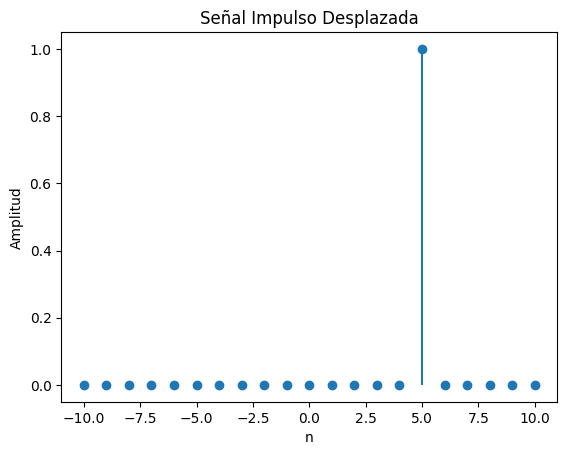

In [ ]:
from scipy.signal import unit_impulse                       # Libreria estandar para estos casos...

n = np.arange(-10, 11)                                      # Crea un vector
impulso = unit_impulse(21, idx=10)                          # Define un impulso en la posición 10 del vector (n=0), 21 es el largo del vector

desplazado = np.roll(impulso, 5)                            # Se desplaza a n = 5

plt.stem(n, desplazado, basefmt=' ')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Señal Impulso Desplazada')
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

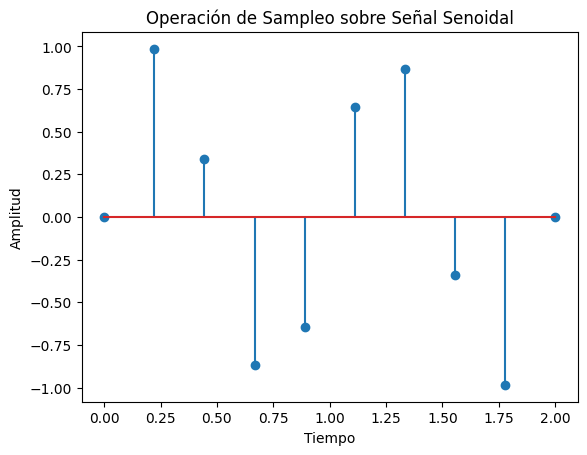

In [ ]:
f = 1  # Frecuencia
t_sampleo = np.linspace(0, 2, 10)                           # Genera un vector, solo 10 muestras para demostrar que la señal es discreta, en estos casos siempre son discretas...
señal_sampleo = np.sin(2 * np.pi * f * t_sampleo)           # Se genera la señal

plt.stem(t_sampleo, señal_sampleo)                          # Se gráfica con stem, para ver solo los impulsos
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Operación de Sampleo sobre Señal Senoidal')
plt.show()

### 3.3 Genere una señal Triangular y realice la operación de sampleo

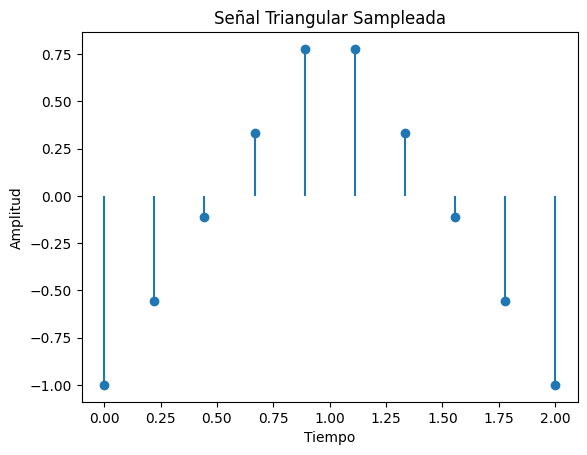

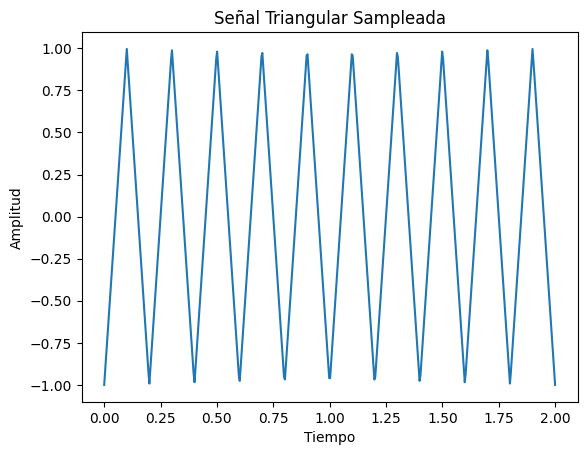

In [ ]:
from scipy.signal import sawtooth                   # sawtooth se usa para señales triangulares

t = np.linspace(0, 2, 500)
triangular = sawtooth(2 * np.pi * 5 * t, 0.5)  # Forma triangular

t_sampleo = np.linspace(0, 2, 10)
triangular_sampleo = sawtooth(2 * np.pi * 5 * t_sampleo, 0.5)

plt.stem(t_sampleo, triangular_sampleo, basefmt=' ')                # Acá se muestra sampleada, se puede ajustar el número de muestras para que se asemeje a la "continua"
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Triangular Sampleada')
plt.show()

plt.plot(t, triangular)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Triangular')
plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

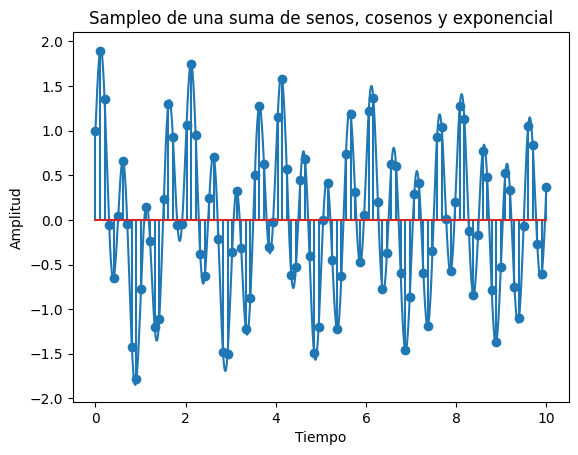

In [40]:
import numpy as np
import matplotlib.pyplot as plt


t_continuo = np.linspace(0, 10, 1000)
señal_continuo = np.sin(4 * np.pi * t_continuo) + np.cos(np.pi * t_continuo) * np.exp(-0.1 * t_continuo)            # Señal continua

t_sampleo = np.linspace(0, 10, 100)  # Menos puntos = menor resolución
señal_sampleada = np.sin(4 * np.pi * t_sampleo) + np.cos(np.pi * t_sampleo) * np.exp(-0.1 * t_sampleo)              # Señal discreta

plt.plot(t_continuo, señal_continuo)
plt.stem(t_sampleo, señal_sampleada)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Sampleo de una suma de senos, cosenos y exponencial")
plt.show()

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

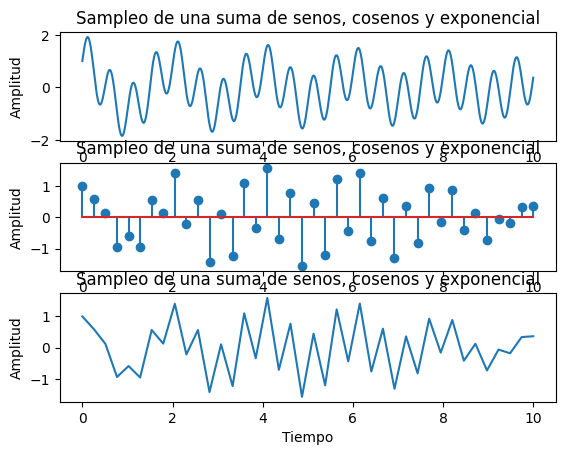

In [55]:
import numpy as np
import matplotlib.pyplot as plt


t_continuo = np.linspace(0, 10, 1000)
señal_continuo = np.sin(4 * np.pi * t_continuo) + np.cos(np.pi * t_continuo) * np.exp(-0.1 * t_continuo)            # Señal continua


t_sampleo = np.linspace(0, 10, 40) # Para item 1 la muestra debe ser de 20, para 2do item debe ser de 40 y para el 3ro debe ser de 100 (cambiar el tercer número del linspace por 20, 40 y 100)
señal_sampleada = np.sin(4 * np.pi * t_sampleo) + np.cos(np.pi * t_sampleo) * np.exp(-0.1 * t_sampleo)              # Señal discreta


plt.subplot(3,1,1)
plt.plot(t_continuo, señal_continuo)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Sampleo de una suma de senos, cosenos y exponencial")

plt.subplot(3,1,2)
plt.stem(t_sampleo, señal_sampleada)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Sampleo de una suma de senos, cosenos y exponencial")

plt.subplot(3,1,3)
plt.plot(t_sampleo, señal_sampleada)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Sampleo de una suma de senos, cosenos y exponencial")
plt.show()



Analizando la señal se obtiene que la frecuencia $F_{max}$ es 2 Hz. Entonces para que se cumpla el criterio de Nyquist la frecuencia de muestreo debe ser de 4 Hz. En el código eso equivale a un número de muestras de 40, ya que la frecuencia de sampleo es el número de puntos dividido la duración de la señal.

El teorema de Nyquist se cumple para 4 Hz y 10 Hz.

## 4. Análisis en el dominio de la frecuencia


### 4.1 Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


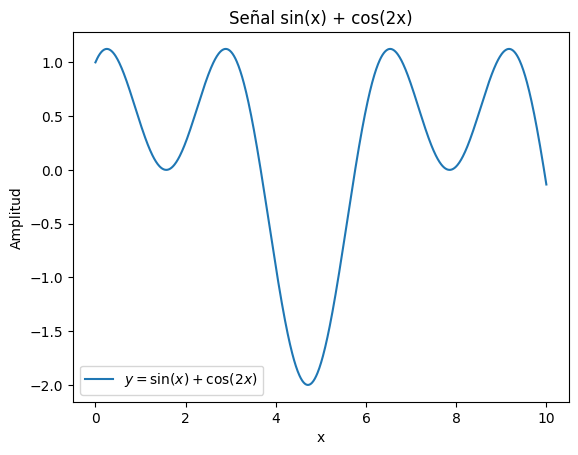

In [56]:
x = np.linspace(0, 10, 1000)
y = np.sin(x) + np.cos(2 * x)

plt.plot(x, y, label=r'$y = \sin(x) + \cos(2x)$')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.title('Señal sin(x) + cos(2x)')
plt.legend()
plt.show()

### 4.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

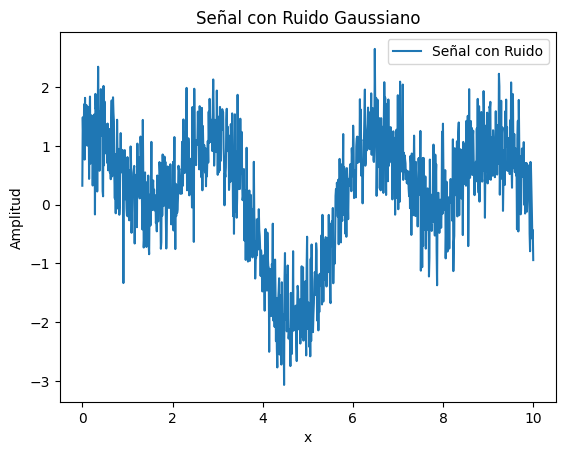

In [57]:
ruido = np.random.normal(0, 0.5, len(y))  # Ruido Gaussiano
y_ruidosa = y + ruido

plt.plot(x, y_ruidosa, label='Señal con Ruido')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.title('Señal con Ruido Gaussiano')
plt.legend()
plt.show()

### 4.3 Obtenga la transformada de Fourier para las dos señales que generaste previamente


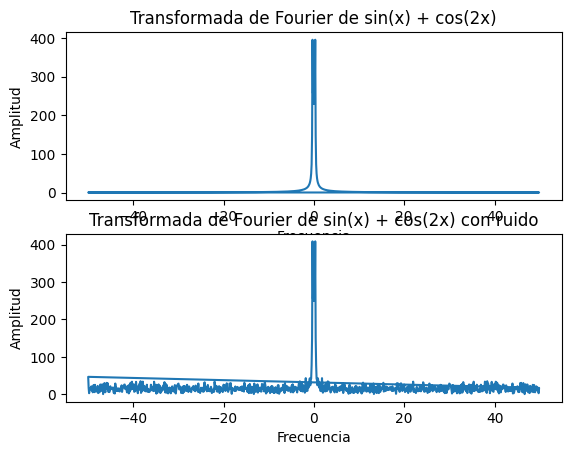

In [ ]:
from scipy.fft import fft, fftfreq

# Transformada de Fourier
fft_y = fft(y)
fft_y_ruidosa = fft(y_ruidosa)
fft_freq = fftfreq(len(y), d=x[1] - x[0])  
fft_freq_ruido = fftfreq(len(y_ruidosa), d=x[1] - x[0])

plt.subplot(2,1,1)
plt.plot(fft_freq, abs(fft_y), label='Transformada de Fourier')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de sin(x) + cos(2x)')

plt.subplot(2,1,2)
plt.plot(fft_freq_ruido, abs(fft_y_ruidosa), label='Transformada de Fourier')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de sin(x) + cos(2x) con ruido')

plt.show()

### 4.4 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

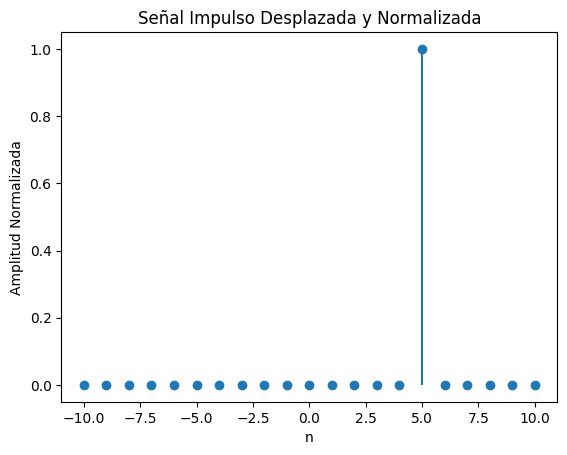

In [ ]:
from scipy.signal import unit_impulse 
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10, 11) 
impulso = unit_impulse(21, idx=10)  

desplazado = np.roll(impulso, 5) 

desplazado_normalizado = desplazado / np.max(desplazado)  # Divide por el máximo valor para normalizar

# Graficar la señal impulso desplazada y normalizada
plt.stem(n, desplazado_normalizado, basefmt=' ')
plt.xlabel('n')
plt.ylabel('Amplitud Normalizada')
plt.title('Señal Impulso Desplazada y Normalizada')
plt.show()

Creo que no tiene sentido normalizar la señal del punto 3.1...

### 4.5 Encuentra la transformada inversa de Fourier
_Solo para una señal de las dos que generaste inicialmente_.

En este caso puede usar una librería. 

Explica en detalle que hace la librería y el resultado que arroja.

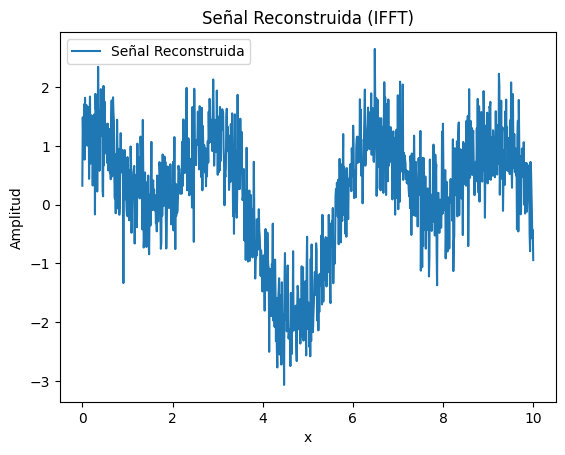

In [ ]:
from scipy.fft import ifft

# Calcular la transformada inversa de Fourier
señal_reconstruida = ifft(fft_y_ruidosa)            # Se reconstruye la señal ruidosa

# Graficar la señal reconstruida
plt.plot(x, señal_reconstruida.real, label='Señal Reconstruida')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.title('Señal Reconstruida (IFFT)')
plt.legend()
plt.show()

Se puede ver que la reconstrucción es de alta calidad, la libreria funciona muy bien, tanto que parece que no se hubiera cambiado de dominio en ningún momento.
La función ifft del módulo scipy.fft calcula la transformada inversa de Fourier Discreta. Convierte datos desde el dominio de la frecuencia devuelta al dominio del tiempo. Se usa principalmente para reconstruir señales. Devuelve un conjunto de vaores complejos que representan la señal en el dominio del tiempo.

# 5 Explica tus hallazgos (explicar basado en la teoría)
- Explica que comprobaste con relación al sampleo de señales.
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

Al trabajar con sampleo de señales se puede notar que el teorema de Nyquist se cumple, la frecuencia de sampleo debe ser al menos el doble de la frecuencia máxima de la señal original para evitar aliasing. Cuando es menor al dobre de la frecuencia máxima se observan distorsiones en la señal reconstruida, lo que lleva a una perdida de información.
Entonces lo ideal es usar un mayor número de muestras para generar una representación más fiel de la señal original.

El ruido gaussiano añade perturbaciones suaves a la señal original, manteniendo una forma general reconocible pero con cambios impredecibles. Este ruido no afecta mucho a los gráficos, y la señal se pudo recuperar de todas formas, pero eso se debe a la señal original, que no tiene mayor complejidad.

La FFT convierte la señal del dominio del tiempo al dominio de la frecuencia, revelando las componentes frecuenciales presentes en la señal.
El resultado de la FFT incluye tanto las magnitudes como las fases de las componentes frecuenciales, lo que permite analizar la intensidad y el desplazamiento de cada frecuencia. 
La IFFT demuestra que la señal original puede ser reconstruida completamente en el dominio del tiempo, siempre que el sampleo cumpla el criterio de Nyquist.


## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html